In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

100%|██████████| 9.94G/9.94G [07:26<00:00, 23.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3


In [3]:
#Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #hpw does it visulaizes
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [4]:
#to ensure the Gpu is present
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0: # Pass physical_devices to len()
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print ('GPU is used')
else:
     print ('GPU is not used')

GPU is used


In [9]:
#Load and explore dataset
train_dir='/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/train'
val_dir='/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/val'
test_dir='/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/test'

In [10]:
#list all the classes
classes=os.listdir(train_dir)
num_classes=len(classes)

#display the classes name
print(f'NUmber of classes: {num_classes}')
print(f'Classes: {classes}')


NUmber of classes: 2
Classes: ['fire', 'nofire']


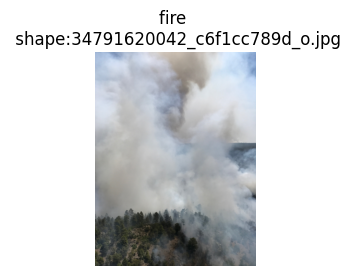

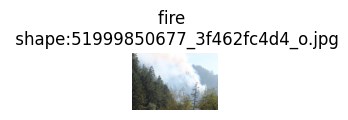

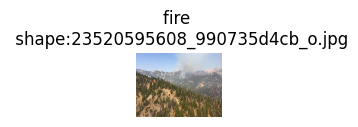

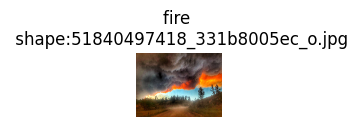

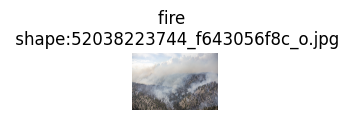

In [11]:
#lets visualize the iamges in the dataset
plt.figure(figsize=(12,10))
for i in range(5):
  class_path=os.path.join(train_dir,classes[0]) #concatentate the folder and files
  image_name=os.listdir(class_path)[i]
  image_path=os.path.join(class_path,image_name)
  image=plt.imread(image_path)

  plt.subplot(1,5,i+1) #rows, columns, incremental value
  plt.imshow(image)
  plt.title(f'{classes[0]} \n shape:{image_name}')
  plt.axis('off')
  plt.show()

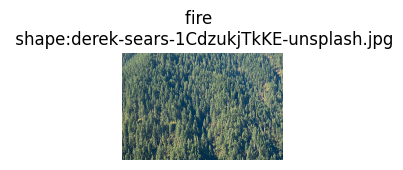

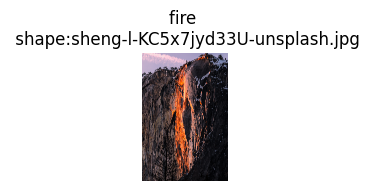

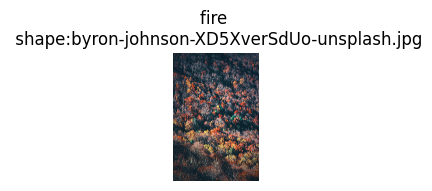

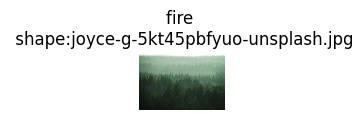

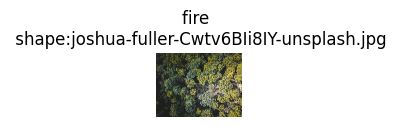

In [12]:
plt.figure(figsize=(12,10))
for i in range(5):
  class_path=os.path.join(train_dir,classes[1]) #concatentate
  image_name=os.listdir(class_path)[i]
  image_path=os.path.join(class_path,image_name)
  image=plt.imread(image_path)

  plt.subplot(1,5,i+1)
  plt.imshow(image)
  plt.title(f'{classes[0]} \n shape:{image_name}')
  plt.axis('off')
  plt.show()

In [13]:
#preprocessing
#image dimensions and batch size
image_width, image_height= 150,150
batch_size=32 #there will be 32 images in a batch

#data generators
train_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width,image_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)
val_generator=val_datagen.flow_from_directory(
    val_dir,
    target_size=(image_width,image_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_width,image_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)



Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [14]:
#map the indices
class_mapping = train_generator.class_indices
#print(class_mapping)
#map the indices
class_mapping = train_generator.class_indices
#print(class_mapping)
#extract the class names
class_names=list(class_mapping.keys())
print("class name:", class_names)

class name: ['fire', 'nofire']


In [15]:
#let's build the CNN model
from tensorflow.keras.layers import Input # Import the Input layer

model= Sequential([
    Input(shape=(image_width,image_height,3)),
    Conv2D(32,(3,3), activation='relu'),  #calculate the parameters=(kernelht*kernelwidth*inputchannel+1)*no.of filters
    MaxPooling2D(pool_size=(2,2)),        #(3*3*3+1)*32 = 28*32= 896

    Conv2D(64,(3,3), activation='relu'),   #(3*3*32+1)*64= 18496
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128,(3,3), activation='relu'),  #(3*3*64+1)*128= 73856
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
]
)

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
#train the model
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,   #batch_size=32
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples//batch_size)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
28/58 ━━━━━━━━━━━━━━━━━━━━ 3:19 7s/step - accuracy: 0.5569 - loss: 0.8435

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


58/58 ━━━━━━━━━━━━━━━━━━━━ 489s 8s/step - accuracy: 0.6025 - loss: 0.7415 - val_accuracy: 0.7161 - val_loss: 0.5752
Epoch 2/10
 1/58 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8125 - loss: 0.5397

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


58/58 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8125 - loss: 0.5397 - val_accuracy: 0.7344 - val_loss: 0.5578
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 504s 9s/step - accuracy: 0.7578 - loss: 0.5056 - val_accuracy: 0.7891 - val_loss: 0.4590
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.6250 - loss: 0.5592 - val_accuracy: 0.7786 - val_loss: 0.4621
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 480s 8s/step - accuracy: 0.7857 - loss: 0.4619 - val_accuracy: 0.7786 - val_loss: 0.4567
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.8125 - loss: 0.3672 - val_accuracy: 0.7812 - val_loss: 0.4478
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 500s 9s/step - accuracy: 0.8046 - loss: 0.4269 - val_accuracy: 0.7995 - val_loss: 0.4540
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.7500 - loss: 0.4433 - val_accuracy: 0.7839 - val_loss: 0.4516
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 538s 8s/step - accuracy: 0.8274 - loss: 0.4032 - val_accuracy: 0.7943 - val_loss: 0.41

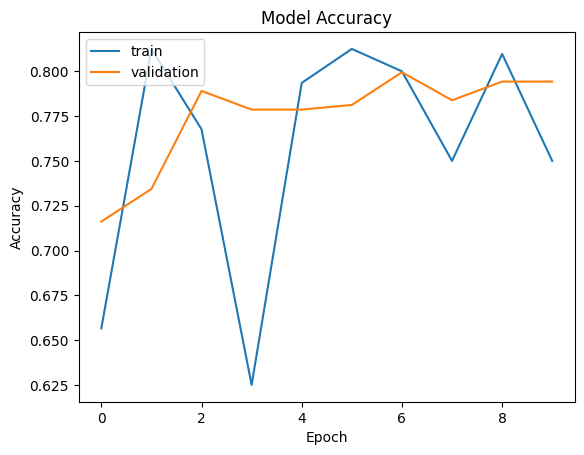

In [18]:
#evaluate the model-plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','validation'],loc='upper left')
plt.show()


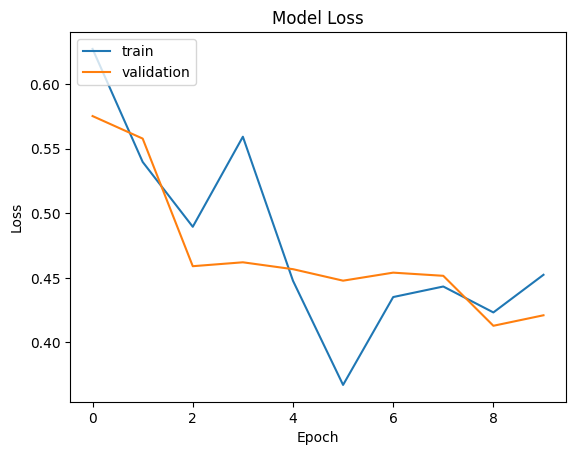

In [19]:
#evaluate the model-plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss') # Change 'Loss' to 'loss'
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [20]:
#evaluate the model using test data
test_loss, test_accuracy=model.evaluate(test_generator, steps=test_generator.samples//batch_size)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy:4f}')

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 1/12 ━━━━━━━━━━━━━━━━━━━━ 1:26 8s/step - accuracy: 0.7812 - loss: 0.3856

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 7/12 ━━━━━━━━━━━━━━━━━━━━ 38s 8s/step - accuracy: 0.7990 - loss: 0.3903

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 92s 8s/step - accuracy: 0.8034 - loss: 0.3941
Test Loss: 0.3950252830982208
Test Accuracy: 0.807292


In [21]:
#save the model
model.save('forestFireDetection.keras')

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the saved model
loaded_model = load_model('forestFireDetection.keras')

#predict on new image-create a function
def predict_fire(image_path):
  image=image.load(image_path,target_size=(image_width,image_height))
  imag_array=image.img_to_array(image)
  image_array=np.expand_dims(image_array,axis=0)
  image_array/= 255.0  #convert the values to 0s and 1s normalization

  prediction= model.predict(image_array)
  if prediction[0]>0.5:
    predicted_class=class_names[1]  #fire
  else:
    predicted_class=class_names[0]  #no fire

  plt.imshow(image)
  plt.title(f'Prediction: {predicted_class}')
  plt.axis('off')
  plt.show()


In [23]:
os.listdir('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire') #list out all those images which are inside no fire directory

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire'

In [24]:
os.listdir('/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/test/nofire') #list out all those images which are inside no fire directory

['thought-catalog-bGiMXk8sMHw-unsplash.jpg',
 'nathan-anderson-MEIBNPI1RC8-unsplash.jpg',
 'kym-mackinnon-mT8BWsYyeU0-unsplash.jpg',
 'nigel-tadyanehondo-RonhCA39VRw-unsplash.jpg',
 'kyle-mesdag-xrLn6YsmjI4-unsplash.jpg',
 'daniil-silantev-VggwSJxYlAw-unsplash.jpg',
 'nathan-queloz-rj0KbZGsOP4-unsplash.jpg',
 '50380847112_db217aea45_o.jpg',
 'jonathan-arbely-5D9k7RnOgLQ-unsplash.jpg',
 'zetong-li-UVv2vL3ih7o-unsplash.jpg',
 'will-suddreth-hneAIGb01xQ-unsplash.jpg',
 'tom-podmore-BdFn6XZzPOY-unsplash.jpg',
 '49422069676_3e89abc052_o.jpg',
 'arnold-dogelis-lsjRjuJlg5M-unsplash.jpg',
 'dave-hoefler-XfRglWxgJXk-unsplash.jpg',
 '52452040025_916ddf3f9d_o.jpg',
 'sander-lenaerts-X4yQIgcSYcQ-unsplash.jpg',
 'kym-mackinnon-SMb0XdJxxfI-unsplash.jpg',
 '43078090081_07d1f9ec0f_o.jpg',
 'max-voxberg-hY5OUxg_Zgc-unsplash.jpg',
 'marek-piwnicki-2W7GMDQGuzI-unsplash.jpg',
 'daniil-silantev-JfAzBxcRbv4-unsplash.jpg',
 'eberhard-grossgasteiger-NB3dTVw1T0o-unsplash.jpg',
 'josh-sorenson-w_QAjcf1ipU-unspl

In [25]:
#predict on new image-create a function
def predict_fire(image_path):
  img = image.load_img(image_path, target_size=(image_width, image_height)) # Change image to image.load_img
  img_array = image.img_to_array(img) # Change image to img
  image_array = np.expand_dims(img_array, axis=0)
  image_array /= 255.0  #convert the values to 0s and 1s normalization

  prediction = loaded_model.predict(image_array) # Change model to loaded_model
  if prediction[0] > 0.5:
    predicted_class = class_names[1]  #fire
  else:
    predicted_class = class_names[0]  #no fire

  plt.imshow(img) # Change image to img
  plt.title(f'Prediction: {predicted_class}')
  plt.axis('off')
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


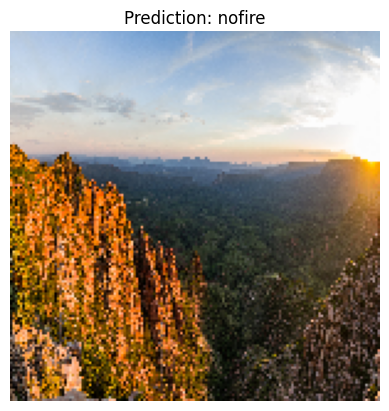

In [26]:
predict_fire('/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/test/nofire/35554264024_b33afa21ac_o.jpg')